# <center style="color: blue; font-size: 40px; margin: 25px;">CREDIT CARD FRAUD DETECTION</center>
<hr style="height: 2px;">
<br>

# Prerequisites for this project


1. Python intepreter
2. Python libraries- Pandas, Numpy, Matplotlib, Seaborn
3. Basic Knowledge of Statistics 
4. Supervised machine learning models

## Installing Pandas explicitly 

In [3]:
!pip install pandas

### Import Pandas

In [3]:
import pandas as pd

### Creating Dataframe using Pandas

In [5]:
df=pd.DataFrame({'Name':['Bob','Sam','Anne','Prit','jyoti','Subhankar'],'Marks':[76,25,94,90,89,67]})
print(df)

        Name  Marks
0        Bob     76
1        Sam     25
2       Anne     94
3       Prit     90
4      jyoti     89
5  Subhankar     67


### Panda's Built in Function to Manipulate Dataframe

In [6]:
print('It will display first 5 records from the data',df.head())

It will display first 5 records from the data     Name  Marks
0    Bob     76
1    Sam     25
2   Anne     94
3   Prit     90
4  jyoti     89


In [7]:
print('It will display last 5 records from the data',df.tail())

It will display last 5 records from the data         Name  Marks
1        Sam     25
2       Anne     94
3       Prit     90
4      jyoti     89
5  Subhankar     67


In [8]:
print('Shape will dispaly the number of total rows and columns',df.shape)

Shape will dispaly the number of total rows and columns (6, 2)


In [9]:
print('Statistical measurement',df.describe())

Statistical measurement            Marks
count   6.000000
mean   73.500000
std    25.820534
min    25.000000
25%    69.250000
50%    82.500000
75%    89.750000
max    94.000000


### Drop row from the Dataframe

In [10]:
new=df
new.drop([0,1,2],axis=0)#for rows axis=0

,Name,Marks
3,Prit,90
4,jyoti,89
5,Subhankar,67


### Drop column from the Dataframe

In [11]:
dnew=df
dnew.drop('Marks',axis=1)

,Name
0,Bob
1,Sam
2,Anne
3,Prit
4,jyoti
5,Subhankar


In [12]:
!wget https://www.dropbox.com/s/18vhxydhoe3g84n/creditcard%202.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 

from sklearn.metrics import classification_report, accuracy_score  
from sklearn.metrics import confusion_matrix 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns

<b>Dataset link: https://www.kaggle.com/aniruddhachoudhury/creditcard-fraud-detection

In [11]:
data_df=pd.read_csv('creditcard.csv')

It contains 285,000 rows of data and 31 columns.<br>
The most important columns are:<br>
 -- Time, <br>
-- Amount,<br>
-- and Class (fraud or not fraud). <br>

data_df[‘Class’] = 0 Not a fraud transaction <br>
data_df[‘Class’] = 1 Fraud transaction


In [15]:
data_df.shape

(284807, 31)

In [12]:
data_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


The head() function here gives us top five rows in the DataFrame 

In [14]:
data_df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


Understanding how many rows and how many columns are there in our dataset 

## Data set information 

In [16]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [18]:
data_df[['Amount','Time','Class']].describe()

,Amount,Time,Class
count,284807.000000,284807.000000,284807.000000
mean,88.349619,94813.859575,0.001727
std,250.120109,47488.145955,0.041527
min,0.000000,0.000000,0.000000
25%,5.600000,54201.500000,0.000000
50%,22.000000,84692.000000,0.000000
75%,77.165000,139320.500000,0.000000
max,25691.160000,172792.000000,1.000000


In [19]:
data_df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [20]:
data_df.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [21]:
data_df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

From the above code as we can see there are no null values among any of our columns

In [22]:
null_columns=pd.DataFrame({'Columns':data_df.isna().sum().index,'No. Null values':data_df.isna().sum().values,'Percentage':data_df.isna().sum().values/data_df.shape[0]})

In [23]:
null_columns

,Columns,No. Null values,Percentage
0,Time,0,0.0
1,V1,0,0.0
2,V2,0,0.0
3,V3,0,0.0
4,V4,0,0.0
5,V5,0,0.0
6,V6,0,0.0
7,V7,0,0.0
8,V8,0,0.0
9,V9,0,0.0


In [24]:
data_df['Class'].tail(10)

284797    0
284798    0
284799    0
284800    0
284801    0
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, dtype: int64

# Finding out the percentage of total fraud and not fraud Transaction  

### <b> Percentage of total not fraud transaction

In [25]:
nfcount = 0
notFraud = data_df['Class']
for i in range(len(notFraud)):
    if notFraud[i]==0:
        nfcount = nfcount + 1
nfcount
per_nf = (nfcount/len(notFraud))*100
print("Percentage of total not fraud transactions in the dataset: ", per_nf)

Percentage of total not fraud transactions in the dataset:  99.82725143693798


### <b> Percentage of total  fraud transaction

In [26]:
fcount=0
Fraud=data_df['Class']
for i in range(len(Fraud)):
  if Fraud[i]==1:
    fcount=fcount+1

fcount    
per_f=(fcount/len(Fraud))*100
print('percentage of total fraud transaction in the dataset: ',per_f)


percentage of total fraud transaction in the dataset:  0.1727485630620034


## Making DataFrame for plotting purpose

In [27]:
plot_data=pd.DataFrame()
plot_data['Fraud Transaction']=Fraud
plot_data['Genuine Transaction']=notFraud
plot_data

,Fraud Transaction,Genuine Transaction
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
284802,0,0
284803,0,0
284804,0,0
284805,0,0


# Bar Plot

<AxesSubplot:title={'center':'Bar plot for Fraud VS Genuine transactions'}, xlabel='Fraud Transaction', ylabel='Genuine Transaction'>

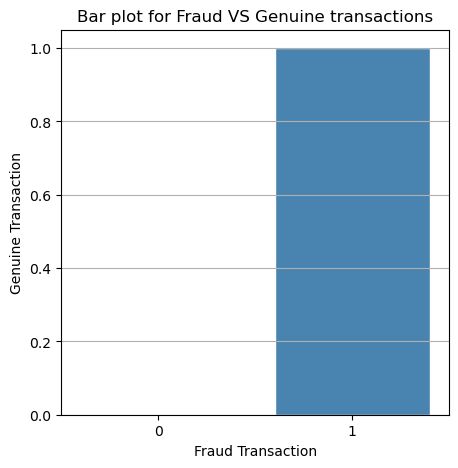

In [28]:
plt.figure(figsize=(5,5))
plt.title("Bar plot for Fraud VS Genuine transactions")
plt.grid()
sns.barplot(x = 'Fraud Transaction', y = 'Genuine Transaction', data = plot_data, palette = 'Blues', edgecolor = 'w')

As per the graph we can say the ratio of genuine transactions are higher than fraud transactions.


# Line Plot

Text(0.5, 1.0, 'Time Vs amount')

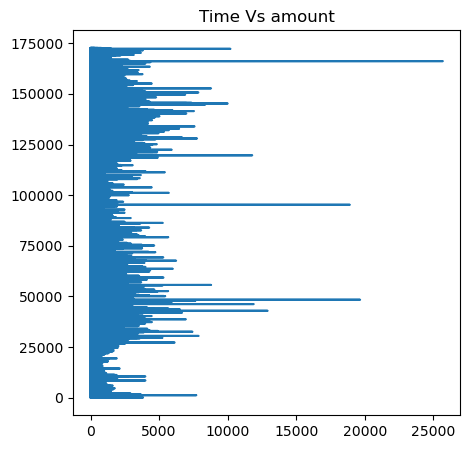

In [29]:
plt.figure(figsize=(5,5))
x=data_df['Amount']
y=data_df['Time']
plt.plot(x, y) 
plt.title('Time Vs amount') 
#sns.barplot(x = x, y = y, data = data, palette = 'Blues', edgecolor = 'w')

In this graph we try to plot the relation between Time and the amount.

# Dist Plot

C:\Users\mishr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


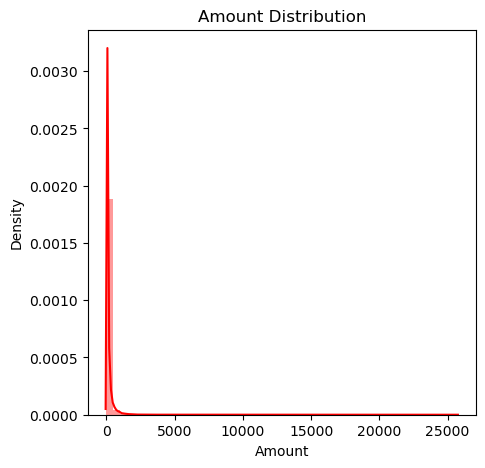

In [30]:
plt.figure(figsize=(5,5), )
plt.title('Amount Distribution')

sns.distplot(data_df['Amount'],color='red');

From this amount distribution curve  it is shown that the number high amount transactions are very low. So there is a high probability for huge transactions to be fraudulent .



# Importing libraries 

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statistics
import math
import pandas as pd

# Scatter Plot showing fraud vs genuine transaction 

Text(0.5, 1.0, 'Scatter Plot showing fraud vs genuine transactions')

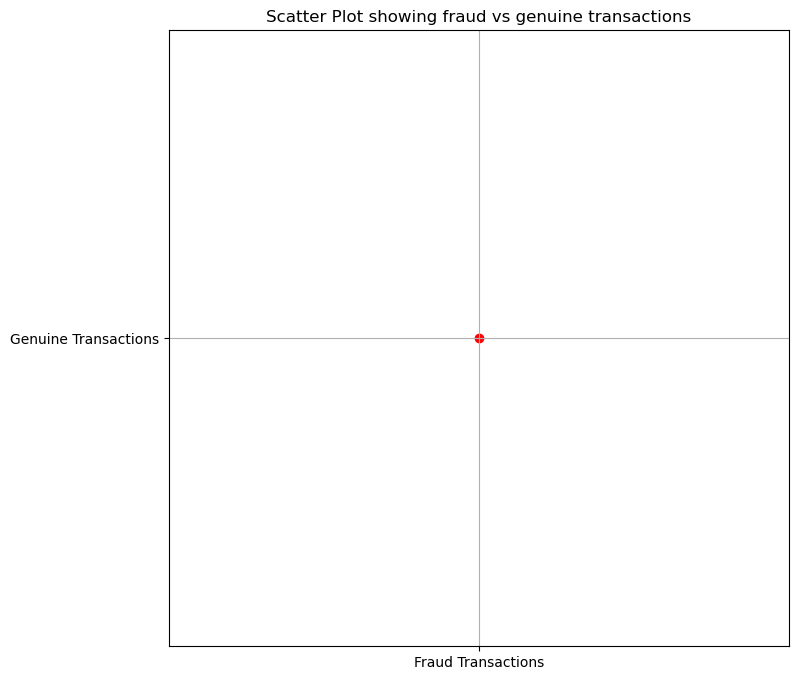

In [32]:
plt.figure(figsize=(8,8))
a = 'Fraud Transactions'
b = 'Genuine Transactions'
plt.scatter(a,b,color='red')
plt.grid()
plt.title('Scatter Plot showing fraud vs genuine transactions')

# Box Plot 

<AxesSubplot:>

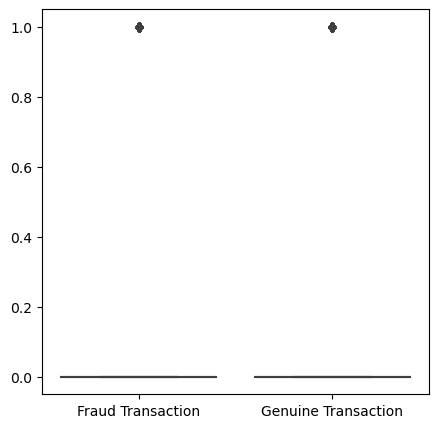

In [33]:
plt.figure(figsize=(5,5))
sns.boxplot(data = plot_data)

# Scatter Plot showing (Time vs Amount)

###Outliers

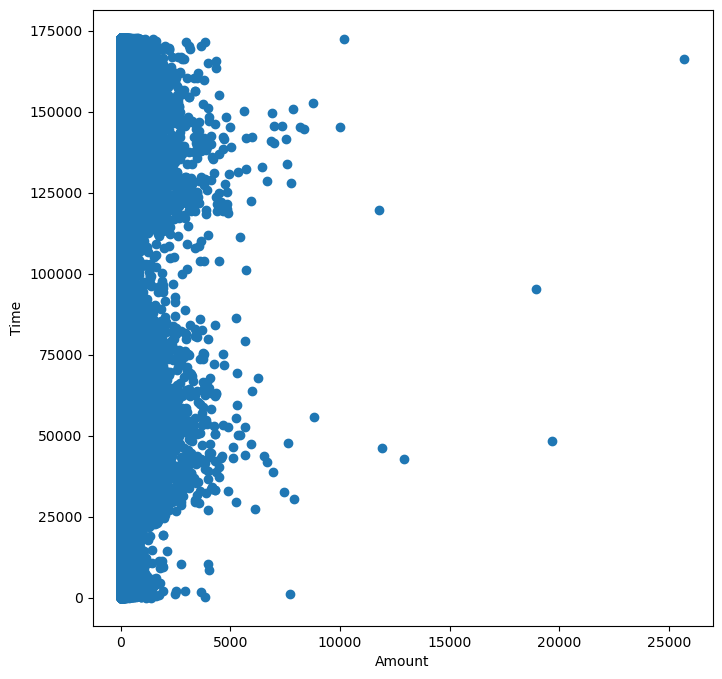

In [34]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(data_df['Amount'], data_df['Time'])
ax.set_xlabel('Amount')
ax.set_ylabel('Time')
plt.show()

# Heatmap

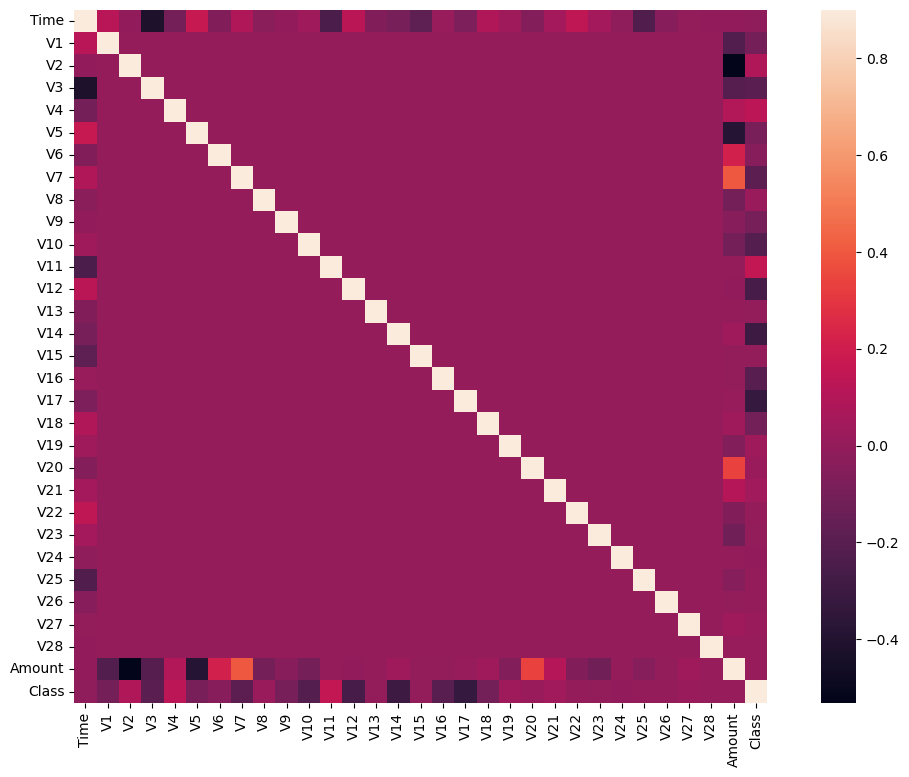

In [35]:
# Correlation matrix 
correlation_metrics = data_df.corr() 
fig = plt.figure(figsize = (14, 9)) 
sns.heatmap(correlation_metrics, vmax = .9, square = True) 
plt.show() 

Correlation metrics help us to understand the core relation between two attributes.



<b>To start with modelling First we need to split the dataset<br>
80% → 80% of the data will use to train the model<br>
20% → 20% to validate the model<br>


In [36]:
x=data_df.drop(['Class'], axis = 1)#drop the target variable
y=data_df['Class']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 42) 

In [37]:
logisticreg = LogisticRegression(max_iter=400)
logisticreg.fit(xtrain, ytrain)


LogisticRegression(max_iter=400)

In [38]:
y_pred = logisticreg.predict(xtest)
accuracy= logisticreg.score(xtest,ytest)
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

### <B> Confusion Matrix</b>
-- Positive (P) : Observation is positive (for example: The transaction genuine).<br>
-- Negative (N) : Observation is not positive (for example:The transaction is not genuine).<br>
-- True Positive (TP) : Observation is positive, and is predicted to be positive.<br>
-- False Negative (FN) : Observation is positive, but is predicted negative.<br>
-- True Negative (TN) : Observation is negative, and is predicted to be negative.<br>
-- False Positive (FP) : Observation is negative, but is predicted positive.<br>


<a href="https://imgbb.com/"><img src="https://i.ibb.co/41Vjvvh/Confusion-Matrix1-1.png" alt="Confusion-Matrix1-1" border="0"></a><br /><a target='_blank' href='https://poetandpoem.com/Richard-Brautigan/poems'></a><br />

<a href="https://imgbb.com/"><img src="https://i.ibb.co/MnfKcWZ/Confusion-Matrix2-2.png" alt="Confusion-Matrix2-2" border="0"></a><br /><a target='_blank' href='https://poetandpoem.com/pain'></a><br />

In [39]:
cm = metrics.confusion_matrix(ytest, y_pred)
print(cm)

[[56854    10]
 [   45    53]]


### <b>Accuracy calculation

In [40]:
print('Accuracy score of the Logistic regression model: ', accuracy*100,'%')

Accuracy score of the Logistic regression model:  99.90344440153085 %


##  Implementing the Random Forest model

In [41]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import seaborn as sns 
data = pd.read_csv('creditcard.csv')
# Determine number of fraud cases in dataset
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


In [42]:
#dividing the X and the Y from the dataset
X = data.drop(['Class'], axis = 1)
Y = data["Class"]
print(X.shape)
print(Y.shape)
# getting just the values for the sake of processing aa
# (its a numpy array with no columns)
xData = X.values
yData = Y.values

(284807, 30)
(284807,)


<b>To start with modelling First we need to split the dataset<br>
80% → 80% of the data will use to train the model<br>
20% → 20% to validate the model<br>

In [43]:
# Using Scikit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(
        xData, yData, test_size = 0.2, random_state = 42)

In [44]:
# Building the Random Forest Classifier (RANDOM FOREST)
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)
# predictions
yPred = rfc.predict(xTest)
yPred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [45]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

n_outliers = len(fraud)
n_errors = (yPred != yTest).sum()
print("The model used is Random Forest model")

acc = accuracy_score(yTest, yPred)
print("The accuracy is {}".format(acc))

prec = precision_score(yTest, yPred)
print("The precision is {}".format(prec))

rec = recall_score(yTest, yPred)
print("The recall is {}".format(rec))

f1 = f1_score(yTest, yPred)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(yTest, yPred)
print("The Matthews correlation coefficient is{}".format(MCC))


The model used is Random Forest model
The accuracy is 0.9995786664794073
The precision is 0.9743589743589743
The recall is 0.7755102040816326
The F1-Score is 0.8636363636363635
The Matthews correlation coefficient is0.8690748763736589


## Comparing the accuracy of both the implemented models

In [46]:
print('Accuracy score of the Logistic regression model: ', accuracy*100,'%')
print('Accuracy of the Random Forest model is: ', acc*100,'%')

Accuracy score of the Logistic regression model:  99.90344440153085 %
Accuracy of the Random Forest model is:  99.95786664794073 %


On comparing the above implemented models we can see that the accuracy of the random forest classifer model is slightly more than the logistic regression model

The reason why we are getting above 99% accuracy is that, our dataset is clean and don't have any null values or outliers.
We have handled it in the initial phase of data analysis only.

## Line Plot Showing accuracies of Our Models 

<function matplotlib.pyplot.ylabel(ylabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

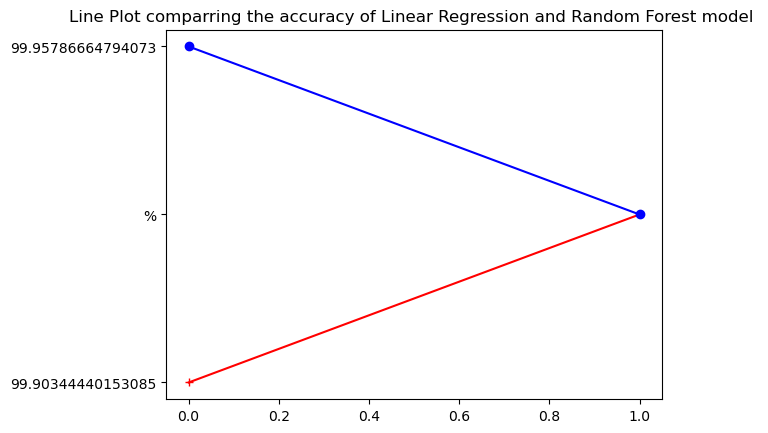

In [47]:
a = accuracy*100,'%'
b = acc*100,'%'
plt.plot(a, color = 'red',marker = '+')
plt.plot(b,color ='blue', marker='o')
plt.title("Line Plot comparring the accuracy of Linear Regression and Random Forest model ")
plt.ylabel

<b>From the above line plot we can compute that their is very slight difference in the accuracies

## Comparing accuracy of Above implemented models using Histograms

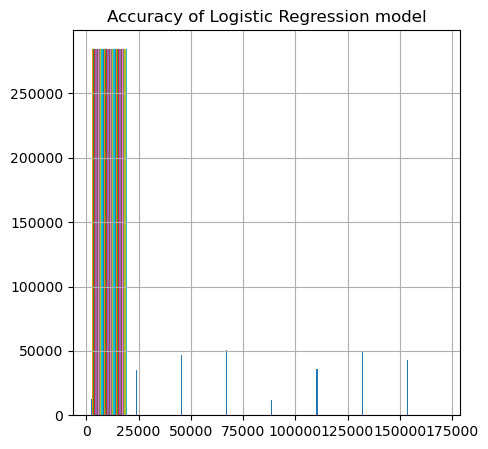

In [48]:
plt.figure(figsize=(5,5))
plt.title("Accuracy of Logistic Regression model")
plt.hist(x,histtype = 'bar',bins = 8)
plt.grid()

## plt.figure(figsize=(5,5))

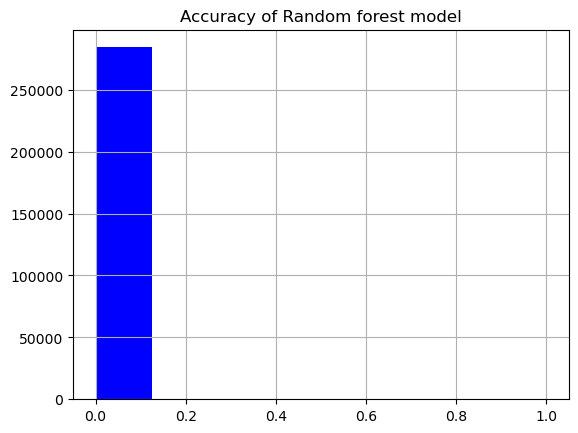

In [49]:
plt.title("Accuracy of Random forest model")
plt.hist(y,color='blue',histtype = 'bar',bins = 8)
plt.grid()

# Classification Report - Random Forest

In [50]:
from sklearn.metrics import classification_report
cr = classification_report(yPred, yTest)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56884
           1       0.78      0.97      0.86        78

    accuracy                           1.00     56962
   macro avg       0.89      0.99      0.93     56962
weighted avg       1.00      1.00      1.00     56962



<hr style="background-color: red; height: 1.5px;">

# Decision Tree Classifier

In [55]:
# import model
from sklearn.tree import DecisionTreeClassifier

# train the model
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(xTrain, yTrain)

# predict the values using trained model
dtree_predictions = dtree_model.predict(xTest)

print(dtree_predictions)

[1 0 0 ... 0 0 0]


<h2 style="color: #666;">Decision tree classifier - Confusion matrix</h2>

C:\Users\mishr\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


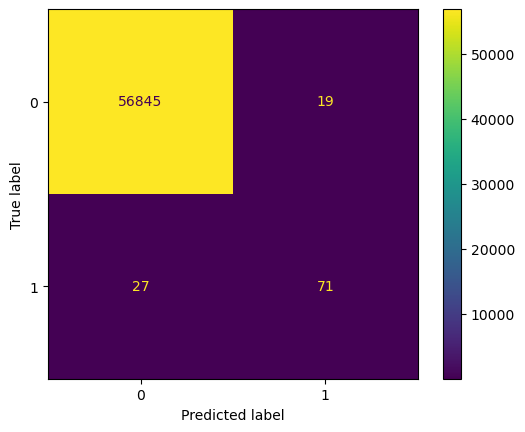

In [62]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(dtree_model, xTest, yTest)
plt.show()

<h2 style="color: #666;">Decision tree classifier - Accuracy Score</h2>

In [18]:
acc = accuracy_score(yTest, yPred)
print("The model predicts the fraud with {}% accuracy".format(acc*100))

NameError: name 'yTest' is not defined

<h2 style="color: #666;">Decision tree classifier - Classification Report</h2>

<AxesSubplot:>

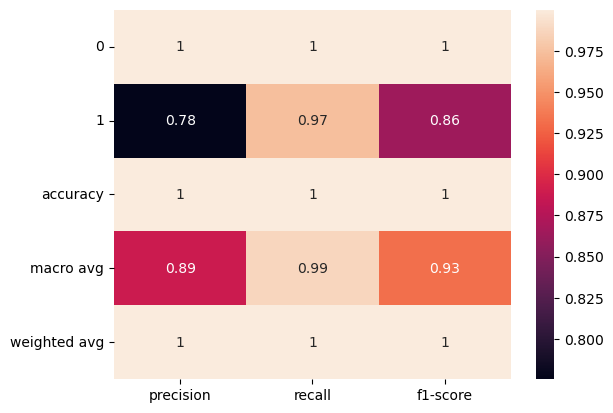

In [65]:
from sklearn.metrics import classification_report
cr = classification_report(yPred, yTest, output_dict=True)

# plotting
sns.heatmap(pd.DataFrame(cr).iloc[:-1, :].T, annot=True)

In [ ]:
# 